#  🚲 출력 결과 정리
LinearRegression  
RMSLE 1.165 RMSE 140.900 MAE 105.924

target값 log1p로 변환 후 LinearRegression  
RMSLE 1.017 RMSE 162.594 MAE 109.286

One-Hot Encoding 후 LinearRegression  
RMSLE 0.590 RMSE 97.688 MAE 63.382

One-Hot Encoding 후 Ridge  
RMSLE 0.590 RMSE 98.529 MAE 63.893

One-Hot Encoding 후 Lasso  
RMSLE 0.635 RMSE 113.219 MAE 72.803

RandomForestRegression  
RMSLE 0.354 RMSE 50.550 MAE 31.287

GradientBoost  
RMSLE 0.330 RMSE 53.332 MAE 32.736

XGBoost  
RMSLE 0.339 RMSE 51.475 MAE 31.357

LightGBM  
RMSLE 0.319 RMSE 47.215 MAE 29.029

**LGBMRegressor**  
Best Parameters: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': 16, 'learning_rate': 0.1}  
RMSLE: 0.315, RMSE: 46.495, **MAE: 28.726**

DecisionTreeRegressor  
Best Parameters: {'max_depth':None, 'min_samples_leaf':5, 'min_samples_split':2}  
RMSLE: 0.452, RMSE: 63.217, MAE: 38.138

ElasticNet  
RMSLE: 1.179, RMSE: 143.873, MAE: 106.506  

ElasticNet + alpha(alpha=0.09, l1_ratio=0.1)  
RMSLE: 1.167, RMSE: 141.379, MAE: 105.543

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


In [5]:
# season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

# weather:
# 1 = 맑음, 구름 약간, 부분적으로 구름, 부분적으로 구름
# 2 = 안개 + 구름, 안개 + 깨진 구름, 안개 + 구름 약간, 안개
# 3 = 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
# 4 = 폭우 + 얼음판 + 뇌우 + 안개, 눈 + 안개

datetime을 나누어서 컬럼으로 생성하였으므로 제거  
casual, registered 는 count 로 표현하기 때문에 제거

In [7]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

KeyError: "['datetime', 'casual', 'registered'] not found in axis"

In [8]:
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


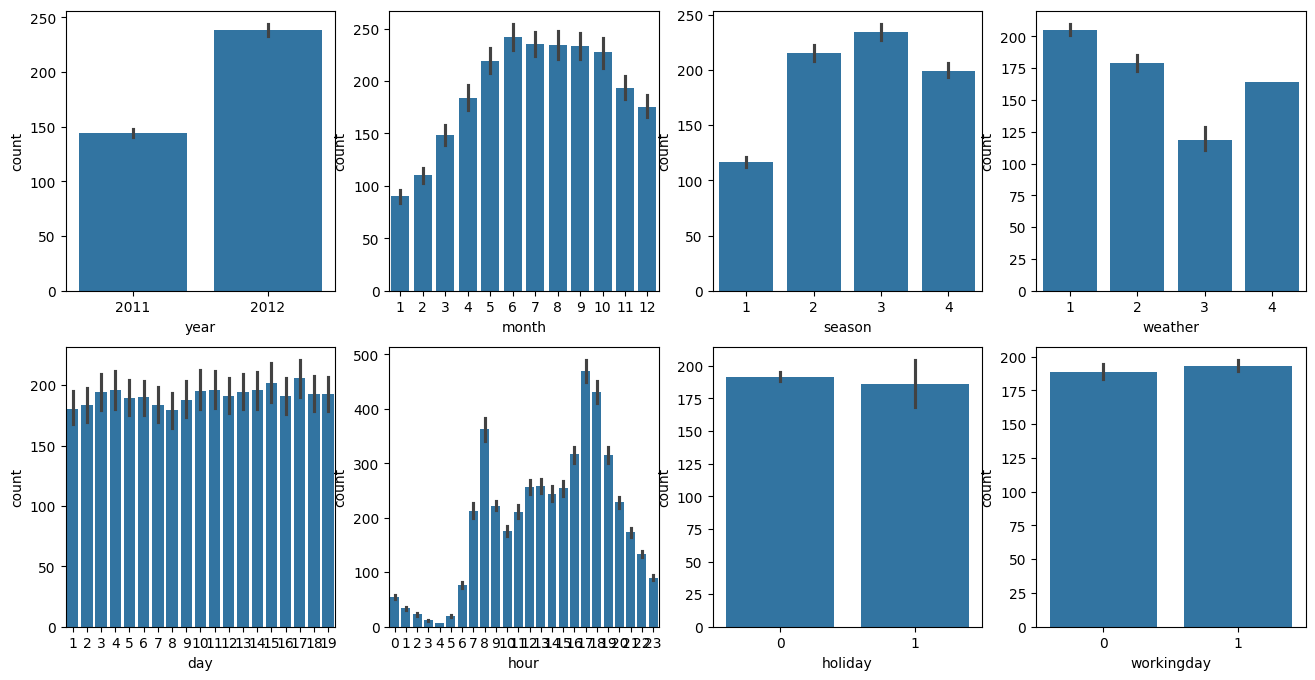

In [13]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday'] # 나머지 컬럼은 연속형이기 때문에 barplot에는 적절한 binning이 필요하므로 x
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [15]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


day가 19일까지만 나오는 것은 train, test로 구분되기 때문이다.  
그렇지만 day 시각화를에서 일별 차이는 희미하기에 큰 영향은 없다고 생각된다.


In [22]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

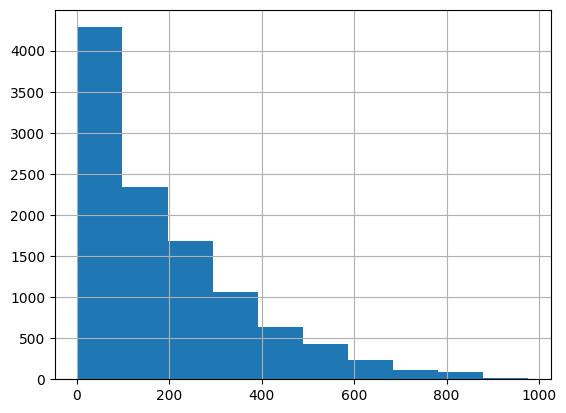

In [23]:
y_target.hist()

값이 커질수록 개수는 적어지므로 불균형이 심한 분포임을 확인할 수 있다.  
따라서 log를 취해 정규 분포 형태가 되도록 한다.

<Axes: >

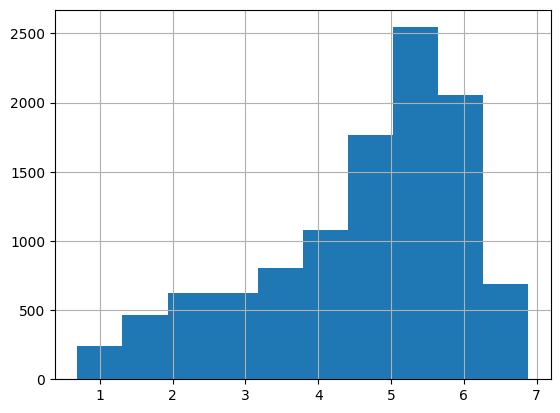

In [24]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [25]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


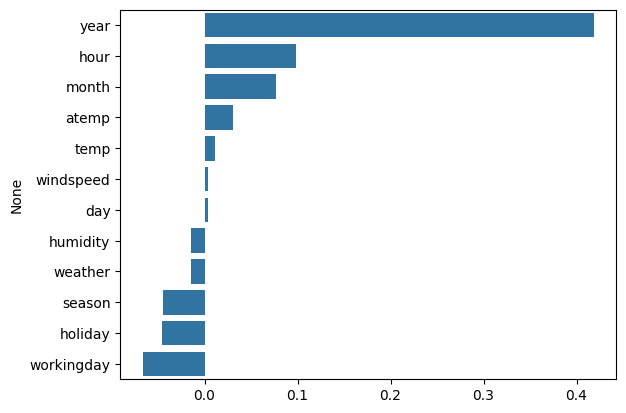

In [26]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

weather의 영향을 많이 받을 거라고 예상했던 결과와 달리,  
year가 count에 가장 큰 영향을 주는 피처였다.  
따라서 year를 숫자의 크기가 아닌 구분으로 이해하기 위해 원핫 인코딩을 해준다.

In [27]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding

# 없는 day까지 encoding
X_features['day'] = pd.Categorical(X_features['day'], categories=range(1, 31))


X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [28]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10882,14.76,17.425,57,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10883,13.94,15.910,61,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10884,13.94,17.425,61,6.0032,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False


In [29]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: ylabel='None'>

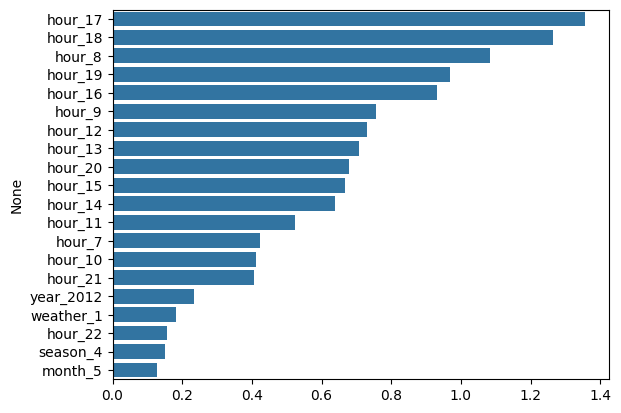

In [30]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.550, MAE: 31.287
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.332, MAE: 32.736
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# 하이퍼 파라미터 튜닝 방법 가이드

우선 무슨 파라미터가 있는지 알아보자
검색을 해봅시다
공식문서나, 정리된 블로그를 찾아봅시다

아래는 그냥 구글에 lgbm 하이퍼 파라미터를 검색해봤을때 나온 블로그 하나를 예시로 넣어두었습니다

https://zzinnam.tistory.com/entry/lightgbm-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

## RandomizedSearchCV를 이용해서 최적의 하이퍼 파라미터 찾기

In [32]:
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# 각 모델에 대한 파라미터 그리드
param_grids = {
        'n_estimators': [500],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [2, 4, 8, 16],
        'num_leaves': [31, 50, 70]
    }

model = LGBMRegressor()


rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids,
        n_iter=10,
        scoring=rmsle_scorer,
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
search.fit(X_train.values, y_train.values)
best_model = search.best_estimator_

print("Best Parameters:", search.best_params_)
get_model_predict(best_model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
Best Parameters: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': 16, 'learning_rate': 0.1}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### LGBMRegressor ###
RMSLE: 0.315, RMSE: 46.495, MAE: 28.726


### 평가 결과
### LGBMRegressor ###
Best Parameters: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': 16, 'learning_rate': 0.1}

RMSLE: 0.315, RMSE: 46.495, MAE: 28.726

디폴트 값보다는 조금더 좋아졌다

## 의사결정나무

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

dt_clf = DecisionTreeRegressor(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.475, RMSE: 65.244, MAE: 39.729


## 의사결정나무 + 하이퍼파라미터

### grid_search로 최적의 하이퍼 파라미터 찾기

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

dt_reg = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(
    estimator=dt_reg,
    param_grid=params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


### 하이퍼 파라미터 튜닝

In [50]:
# 하이퍼파라미터 튜닝
dt_reg = DecisionTreeRegressor(
    max_depth = None,
    min_samples_split = 5,
    min_samples_leaf = 2,
)
dt_reg.fit(X_train, y_train)
pred = dt_reg.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 0.452, RMSE: 63.217, MAE: 38.138


## 엘라스틱넷

In [52]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet()
elasticNet.fit(X_train, y_train)
pred = elasticNet.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 1.179, RMSE: 143.873, MAE: 106.506


In [72]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.09, l1_ratio=0.1) # default l1_ratio 0.5
model.fit(X_train, y_train)
pred = model.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 1.167, RMSE: 141.379, MAE: 105.543


l1_ratio 비율이 작을수록 MAE 값이 작아지므로 L2규제를 사용하는 릿지 회귀가 더 좋을 것으로 예상한다.  
ElasticNet: MAE 105.54  
Ridge: MAE 63.893  
Lasso: MAE 72.803  
출력 결과를 확인해 보면, 예상대로 3개의 모델 중 릿지 회귀가 가장 성능이 좋다.



In [33]:
## test_data를 받아오기
test = pd.read_csv('./test.csv')

# train과 같은 전처리를 진행해보자

이것을 하다보면 엄청난 문제에 직면을 하게되는데  
그것은 바로 train data는 day가 1-19일까지   
그리고 test data는 day가 20-31일까지라서  
일반 onehot encoding을 하면 열개수가 달라진다는 사실이다...

일단 카테고리 범위를 지정해주고 더미를 만들어주자! 위에 train도 바꿔주는걸 잊지말자

In [34]:
# train과 같은 전처리
test['datetime'] = test.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
test['year'] = test.datetime.apply(lambda x : x.year)
test['month'] = test.datetime.apply(lambda x : x.month)
test['day'] = test.datetime.apply(lambda x : x.day)
test['hour'] = test.datetime.apply(lambda x: x.hour)
test.head(3)

# 이미 테스트 데이터셋에는 casual, registered 가 빠져있음
drop_columns = ['datetime']
test.drop(drop_columns, axis=1,inplace=True)

# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
test['day'] = pd.Categorical(test['day'], categories=range(1, 31))
test_ohe = pd.get_dummies(test, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])



In [35]:
## sample_data를 받아오기
sample = pd.read_csv('./sampleSubmission.csv')

# count가 0으로 차있는 sample
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [36]:

# 테스트 데이터셋을 예측
pred = best_model.predict(test_ohe)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)

# sample 파일에 예측 값을 넣어주고
sample["count"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission.csv", index=False)

In [37]:
sample

,datetime,count
0,2011-01-20 00:00:00,10.976623
1,2011-01-20 01:00:00,4.077675
2,2011-01-20 02:00:00,2.431671
3,2011-01-20 03:00:00,2.986596
4,2011-01-20 04:00:00,1.544623
...,...,...
6488,2012-12-31 19:00:00,247.156714
6489,2012-12-31 20:00:00,167.401570
6490,2012-12-31 21:00:00,120.760211
6491,2012-12-31 22:00:00,95.814716


In [ ]:
# 오른쪽에 생긴 submission.csv를 다운로드 받아서 캐글에 제출